In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,nltk

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Movie Senitment/Data/total_comment_clean.xlsx')
data.head()

,Unnamed: 0,movie name,label,main comment,comment,cleaned
0,0.0,Nishpap Munna,pos,",""😎😎😎😎😎😎😎😋😋😋😋😋😋😋 nice movie""",", ""😎😎😎😎😎😎😎😋😋😋😋😋😋😋 সুন্দর সিনেমা""",সুন্দর সিনেমা
1,1.0,Nishpap Munna,ntr,"( নিশী মনি )""","( নিশী মনি )""",নিশী মনি
2,2.0,Nishpap Munna,pos,"💜,""I loved movie""","💜, ""আমি সিনেমা পছন্দ করি""",আমি সিনেমা পছন্দ করি
3,3.0,Nishpap Munna,neg,"2022,"",""খুব ফালতু""","2022,"",""খুব ফালতু""",খুব ফালতু
4,4.0,Nishpap Munna,neg,"24,"" ছামার সিনেমা""","24, ""ছামার সিনেমা""",ছামার সিনেমা


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8249 entries, 0 to 8248
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    8249 non-null   float64
 1   movie name    8249 non-null   object 
 2   label         8249 non-null   object 
 3   main comment  8249 non-null   object 
 4   comment       8249 non-null   object 
 5   cleaned       8247 non-null   object 
dtypes: float64(1), object(5)
memory usage: 386.8+ KB


In [ ]:
data.drop(columns={'Unnamed: 0'},axis=1,inplace=True)
data.dropna(inplace=True)

In [ ]:
data.groupby('label').size().reset_index(name='counts')

,label,counts
0,neg,2820
1,ntr,1548
2,pos,3879


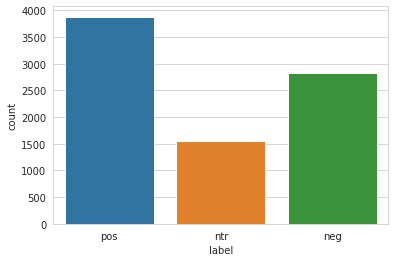

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x = 'label', data = data)

In [ ]:
# Remove the Text with least words
data['length'] = data['cleaned'].apply(lambda x:len(x.split()))
dataset = data.loc[data.length>0]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Text".format(len(data)-len(dataset)),
      "\nTotal Text:",len(dataset))

After Cleaning: 
Removed 0 Small Text 
Total Text: 8247


In [ ]:
dataset

,movie name,label,main comment,comment,cleaned,length
0,Nishpap Munna,pos,",""😎😎😎😎😎😎😎😋😋😋😋😋😋😋 nice movie""",", ""😎😎😎😎😎😎😎😋😋😋😋😋😋😋 সুন্দর সিনেমা""",সুন্দর সিনেমা,2
1,Nishpap Munna,ntr,"( নিশী মনি )""","( নিশী মনি )""",নিশী মনি,2
2,Nishpap Munna,pos,"💜,""I loved movie""","💜, ""আমি সিনেমা পছন্দ করি""",আমি সিনেমা পছন্দ করি,4
3,Nishpap Munna,neg,"2022,"",""খুব ফালতু""","2022,"",""খুব ফালতু""",খুব ফালতু,2
4,Nishpap Munna,neg,"24,"" ছামার সিনেমা""","24, ""ছামার সিনেমা""",ছামার সিনেমা,2
...,...,...,...,...,...,...
8242,Pagla Deewana,neg,হিজলা ছবি,হিজলা ছবি,হিজলা ছবি,2
8243,Pagla Deewana,neg,বাজে ছবি,বাজে ছবি,বাজে ছবি,2
8244,Pagla Deewana,pos,অনেক ভালো,অনেক ভালো,ভালো,1
8245,Pagla Deewana,ntr,ছবি,ছবি,ছবি,1


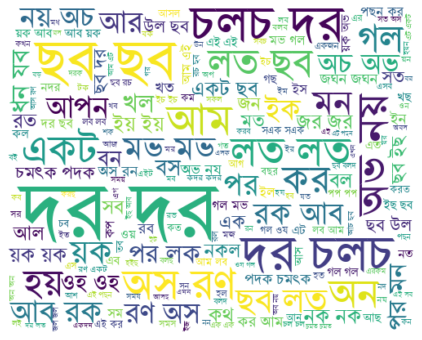

In [ ]:
from wordcloud import WordCloud 
# Plot the Word Cloud
allWords = ' '.join([comnt for comnt in data['cleaned']])
wordCloud = WordCloud(font_path='/content/drive/MyDrive/Movie Senitment/Nikosh/Nikosh.ttf', background_color ='white', width =500, height =400, random_state = 21, max_font_size = 119).generate(allWords)

fig = plt.figure(1, figsize=(10, 6))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
def data_summary(dataset):

    documents = []
    words = []
    u_words = []
    vocab_size = []
    total_u_words = [word.strip().lower() for t in list(dataset.cleaned) for word in t.strip().split()]
    class_label= [k for k,v in dataset.label.value_counts().to_dict().items()]
    for label in class_label: 
        word_list = [word.strip().lower() for t in list(dataset[dataset.label==label].cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        documents.append(len(list(dataset[dataset.label==label].cleaned)))
        words.append(len(word_list))
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.label==label].cleaned))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
    vocab_size = (len(np.unique(total_u_words)))
    
    return documents,words,u_words,class_label,vocab_size

documents,words,u_words,class_names,vocab_size = data_summary(dataset)   


Class Name :  pos
Number of Documents:3879
Number of Words:10239
Number of Unique Words:1430
Most Frequent Words:

সুন্দর	1373
ভাল	649
সিনেমা	372
ভালো	372
মুভি	363
ছবি	260
খুব	254
চলচ্চিত্র	253
সুপার	219
অসাধারণ	163

Class Name :  neg
Number of Documents:2820
Number of Words:7544
Number of Unique Words:987
Most Frequent Words:

ছবি	726
সিনেমা	662
খারাপ	552
ফালতু	424
বাজে	355
খুব	259
মুভি	244
বাল	188
আবাল	184
মভি	138

Class Name :  ntr
Number of Documents:1548
Number of Words:10152
Number of Unique Words:4012
Most Frequent Words:

না	199
ছবি	130
নায়ক	118
মুভি	108
ইয়া	98
এই	82
ওহে	74
ভালো	67
বাংলা	55
সিনেমা	54
Total Number of Unique Words:5183


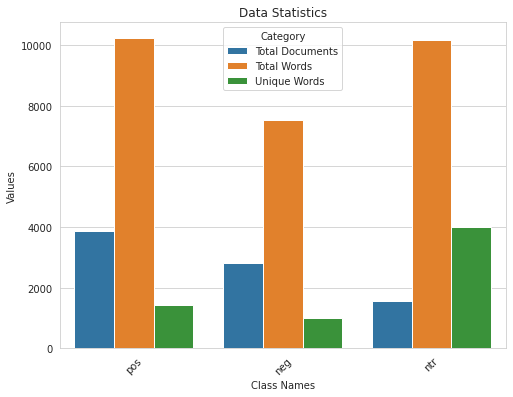

In [ ]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(8, 6))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names') 
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

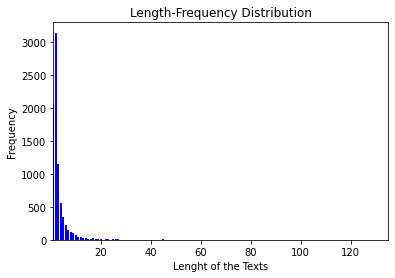

Maximum Length of a Text: 214
Minimum Length of a Text: 1
Average Length of a Text: 3.0


In [ ]:
# Calculate the Text of each of the Text
dataset['TextLength'] = dataset.cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in dataset.TextLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 135)
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()  
print(f"Maximum Length of a Text: {max(dataset.TextLength)}")
print(f"Minimum Length of a Text: {min(dataset.TextLength)}")
print(f"Average Length of a Text: {round(np.mean(dataset.TextLength),0)}")

### feature extraction, label encoding, spilt

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=vocab_size, ngram_range=(1, 1), max_df=1.0, min_df=1)
feature = cv.fit_transform(dataset['cleaned']).toarray()

In [ ]:
feature_names = cv.get_feature_names()
print("Number of feature: {}".format(len(feature_names)))
print("Features: {}".format(feature_names))

Number of feature: 1190
Features: ['অই', 'অক', 'অখ', 'অগ', 'অচ', 'অচল', 'অজ', 'অজপ', 'অট', 'অত', 'অতছ', 'অথচ', 'অথব', 'অদ', 'অদম', 'অধ', 'অন', 'অপ', 'অপচয', 'অপছন', 'অপম', 'অপর', 'অফ', 'অফব', 'অব', 'অবগত', 'অবনত', 'অবশ', 'অবস', 'অভ', 'অম', 'অমর', 'অমরপ', 'অয', 'অযথ', 'অর', 'অরদ', 'অল', 'অশ', 'অষ', 'অস', 'অসভ', 'অসম', 'অহ', 'অহক', 'আই', 'আইইউব', 'আইউব', 'আইক', 'আইচ', 'আইছ', 'আইট', 'আইড', 'আইনট', 'আইপ', 'আইম', 'আইয', 'আইল', 'আইস', 'আউট', 'আউয়', 'আক', 'আকট', 'আকত', 'আকর', 'আখ', 'আখখ', 'আগ', 'আগঢচতমভঙথ', 'আগস', 'আঘ', 'আচ', 'আচর', 'আচল', 'আছ', 'আছর', 'আজ', 'আজই', 'আজও', 'আজক', 'আজব', 'আট', 'আটক', 'আড', 'আত', 'আদ', 'আদব', 'আদম', 'আদর', 'আদল', 'আধ', 'আন', 'আনক', 'আনছ', 'আনত', 'আনন', 'আপ', 'আপড', 'আপন', 'আপল', 'আফ', 'আফগ', 'আফজ', 'আফদ', 'আফর', 'আফস', 'আব', 'আবজ', 'আবদ', 'আবন', 'আবর', 'আবল', 'আভ', 'আম', 'আমখ', 'আমদ', 'আমম', 'আমর', 'আয', 'আর', 'আরও', 'আরগ', 'আরগগবরকগইরগইপকগ', 'আরজ', 'আরফ', 'আরব', 'আরভ', 'আল', 'আলগ', 'আলচ', 'আলত', 'আলম', 'আলমগ', 'আলমজ', 'আলহ', 'আশ', 'আশছ', 'আশম', 'আস', 'আসচ', 'আস

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
cv.vocabulary_

{'দর': 648,
 'মন': 867,
 'আম': 113,
 'পছন': 723,
 'কর': 403,
 'লত': 1009,
 'ভয': 845,
 'বহ': 830,
 'চলচ': 500,
 'নদর': 689,
 'ছব': 516,
 'রণ': 950,
 'ইচ': 165,
 'এই': 259,
 'লব': 1015,
 'সত': 1069,
 'নক': 675,
 'বল': 818,
 'মজ': 859,
 'গছ': 449,
 'আপন': 98,
 'এট': 294,
 'করত': 407,
 'হব': 1132,
 'বড': 796,
 'ষয': 1051,
 'নয': 703,
 'আগ': 67,
 'রহ': 980,
 'এব': 307,
 'ওয': 356,
 'বস': 826,
 'ইট': 172,
 'জন': 541,
 'বনব': 807,
 'খত': 434,
 'নত': 685,
 'নট': 683,
 'একট': 277,
 'কব': 397,
 'সময': 1090,
 'মত': 862,
 'সমস': 1091,
 'নই': 670,
 'অত': 9,
 'যন': 911,
 'জনপ': 544,
 'সব': 1079,
 'অস': 40,
 'সক': 1059,
 'ষম': 1049,
 'এক': 273,
 'টক': 572,
 'আস': 138,
 'গল': 468,
 'অন': 16,
 'একজন': 276,
 'মময': 879,
 'চমত': 492,
 'কদর': 390,
 'ওহ': 362,
 'বর': 814,
 'সম': 1087,
 'পন': 736,
 'শক': 1029,
 'বন': 804,
 'হওয': 1120,
 'যখন': 896,
 'তখন': 611,
 'ঝত': 559,
 'রক': 936,
 'অপ': 17,
 'জঘন': 530,
 'আসল': 144,
 'চর': 496,
 'নন': 692,
 'উচ': 224,
 'দক': 636,
 'রত': 952,
 'ইত': 174,
 'মধ': 866,
 '

In [ ]:
#Label Encoding Function 
from sklearn.preprocessing import LabelEncoder

def label_encoding(sentiment,bool):

    le = LabelEncoder()
    le.fit(sentiment)
    encoded_labels = le.transform(sentiment)
    labels = np.array(encoded_labels) 
    class_names =le.classes_ 
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        for i in sample_data:
            print(sentiment[i],' ', encoded_labels[i],'\n')

    return labels

In [ ]:
# Dataset Splitting  

from sklearn.model_selection import train_test_split

labels = label_encoding(dataset.label,False)

X_train, X_test, y_train, y_test = train_test_split(feature, labels, test_size = 0.20, random_state = 0)


In [ ]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())
count_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,অই,অক,অখ,অগ,অচ,অচল,অজ,অজপ,অট,অত,...,য়লগ,য়লগট,ৰণ,ৰত,ৰথম,ৰন,ৰহম,ৱন,৷এজন,৷ফ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Classification Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score

In [ ]:
def model_defination():

    lr_model = LogisticRegression(random_state = 123, max_iter = 10000)
    dt_model = DecisionTreeClassifier(criterion = 'gini', random_state = 0, max_depth = 1, min_samples_split = 25)
    rf_model = RandomForestClassifier(criterion ='entropy', random_state = 13)
    mnb_model = MultinomialNB(alpha=0.431)
    knn_model = KNeighborsClassifier(n_neighbors=100, metric = 'minkowski', algorithm = 'ball_tree', n_jobs = 10)
    lsvm_model = SVC(kernel = 'linear',C = 0.2, probability=True, random_state = 0)
    ksvm_model = SVC(C= 1000,kernel = 'rbf',probability=True, gamma = 0.00015, random_state = 0)
    sgd_model = SGDClassifier(loss ='log',penalty='l2', max_iter=5)

    model_names = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes','KNN','Linear SVM','Kernel SVM','SGD']
    ml_models = [lr_model,dt_model,rf_model,mnb_model,knn_model,lsvm_model,ksvm_model,sgd_model]
    return ml_models,model_names

In [ ]:
def model_performace(model,X_train,X_test,y_train,y_test):
   
    my_dict = {}
    model.fit(X_train,y_train)
    pred_y = model.predict(X_test)
    my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y),4)*100 
    my_dict['Precision'] = round(precision_score(y_test, pred_y,average='micro'),4)*100 
    my_dict['Recall'] = round(recall_score(y_test, pred_y,average='micro'),4)*100 
    my_dict['F1 Score'] = round(f1_score(y_test, pred_y,average='micro'),4)*100 
    
    return my_dict  

In [ ]:
def performance_table(performance_dict):

    acc_list = []
    pr_list = []
    re_list = []
    f1_list = []
    for i in performance_dict.keys():
        acc_list.append(performance_dict[i]['Accuracy'])
        pr_list.append(performance_dict[i]['Precision'])
        re_list.append(performance_dict[i]['Recall'])
        f1_list.append(performance_dict[i]['F1 Score'])

    performance_df = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list},
                                  index =['LR','DT','RF','MNB','KNN','Linear SVM','RBF SVM','SGD'])
    performance_df.style.highlight_max(color = 'lightgreen', axis = 0)
    return performance_df

In [ ]:
path = "/content/drive/MyDrive/Movie Senitment/json/"

In [ ]:
import json

ml_models,model_names = model_defination()
accuracy = {f'{model_names[j]}':model_performace(model,X_train,X_test,y_train,y_test) for j,model in enumerate(ml_models)}
with open(path+f'ml_performance_bow.json', 'w') as f:
      json.dump(accuracy, f)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


### Result


In [ ]:
accuracy1 = json.load(open('/content/drive/MyDrive/Movie Senitment/json/ml_performance_bow.json'))
table = performance_table(accuracy1)
table

,Accuracy,Precision,Recall,F1 Score
LR,74.73,74.73,74.73,74.73
DT,49.39,49.39,49.39,49.39
RF,74.91,74.91,74.91,74.91
MNB,73.88,73.88,73.88,73.88
KNN,65.94,65.94,65.94,65.94
Linear SVM,72.30,72.30,72.30,72.30
RBF SVM,72.36,72.36,72.36,72.36
SGD,74.30,74.30,74.30,74.30


In [ ]:
print(f"Highest Accuracy achieved by {table.Accuracy.idxmax(axis = 0)} at = {max(table.Accuracy)}")
print(f"Highest F1-Score achieved by {table['F1 Score'].idxmax(axis = 0)} at = {max(table['F1 Score'] )}")
print(f"Highest Precision Score achieved by {table['Precision'].idxmax(axis = 0)} at = {max(table['Precision'] )}")
print(f"Highest Recall Score achieved by {table['Recall'].idxmax(axis = 0)} at = {max(table['Recall'] )}")

Highest Accuracy achieved by RF at = 74.91
Highest F1-Score achieved by RF at = 74.91
Highest Precision Score achieved by RF at = 74.91
Highest Recall Score achieved by RF at = 74.91


# Final Model

 - Selected model: RandomForestClassifier

In [ ]:
classifier1 = RandomForestClassifier(criterion ='entropy', random_state = 13)
classifier1.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=13)

In [ ]:
y_pred = classifier1.predict(X_test)
y_pred[:10]

array([2, 2, 2, 2, 2, 0, 2, 0, 1, 2])

In [ ]:
print(f"Train Accuracy is: {round(classifier1.score(X_train, y_train)*100,2)}%")
print(f"Test Accuracy is : {round(classifier1.score(X_test, y_test)*100,2)}%")

Train Accuracy is: 83.08%
Test Accuracy is : 74.91%


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.68      0.74       542
           1       0.74      0.50      0.60       308
           2       0.72      0.89      0.80       800

    accuracy                           0.75      1650
   macro avg       0.76      0.69      0.71      1650
weighted avg       0.76      0.75      0.74      1650



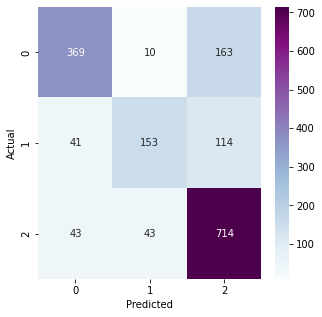

In [ ]:
conf_mat = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="BuPu")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


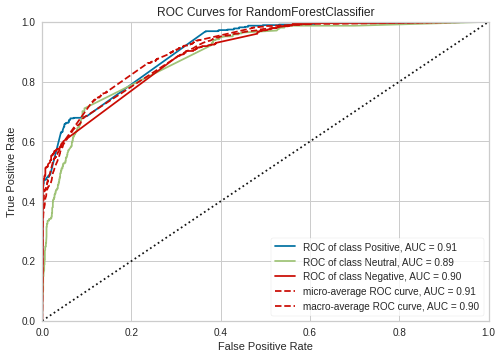

In [ ]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(classifier1, classes=["Positive", "Neutral", "Negative"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()   